In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:38<00:00, 37.3MB/s]
100% 1.06G/1.06G [00:38<00:00, 29.4MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [6]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(directory='/content/train', labels='inferred', 
                                                    label_mode='int', batch_size=32, 
                                                    image_size=(256, 256))

validation_ds = keras.utils.image_dataset_from_directory(directory='/content/test', labels='inferred', 
                                                    label_mode='int', batch_size=32, 
                                                    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalization

def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label
  
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Creat CNN Model

In [10]:
# Arcitecture name - "AMIT'S MODEL"

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# veiw summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_ds, validation_data=validation_ds, batch_size=32, epochs=10)

Epoch 1/10
625/625 [==============================] - 86s 114ms/step - loss: 1.2237 - accuracy: 0.5680 - val_loss: 0.6441 - val_accuracy: 0.6268
Epoch 2/10
625/625 [==============================] - 73s 115ms/step - loss: 0.5975 - accuracy: 0.6797 - val_loss: 0.6387 - val_accuracy: 0.6360
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5133 - accuracy: 0.7465 - val_loss: 0.5440 - val_accuracy: 0.7308
Epoch 4/10
625/625 [==============================] - 69s 111ms/step - loss: 0.4555 - accuracy: 0.7894 - val_loss: 0.5255 - val_accuracy: 0.7358
Epoch 5/10
625/625 [==============================] - 73s 115ms/step - loss: 0.3731 - accuracy: 0.8289 - val_loss: 0.4163 - val_accuracy: 0.8036
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.2964 - accuracy: 0.8735 - val_loss: 0.7591 - val_accuracy: 0.6808
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.2297 - accuracy: 0.9060 - val_loss: 0.3451 - val_ac

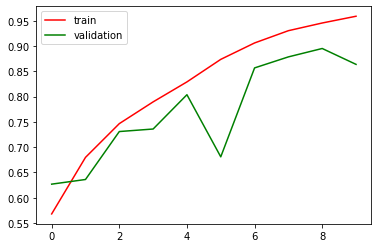

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

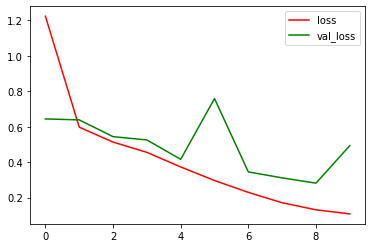

In [15]:
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='green', label='val_loss')
plt.legend()
plt.show()

In [16]:
import cv2

In [35]:
test_img = cv2.imread('/content/baby.jpg')

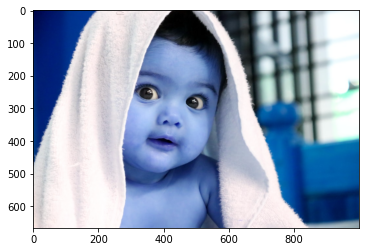

In [36]:
plt.imshow(test_img)

In [38]:
test_img.shape

(667, 1000, 3)

In [39]:
test_img = cv2.resize(test_img, (256,256))

In [40]:
test_input = test_img.reshape((1, 256,256,3))

In [41]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)